In [3]:
import numpy as np
import pandas as pd

data_rating =  pd.read_csv(r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\ml_data_ratings.csv", header=None)
data_rating1=data_rating.transpose()
alpha_bete_r =  pd.read_csv(r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\Labels_for_Beta_Alpha(0-1).csv", header=None)
alpha_bete_r=alpha_bete_r.transpose()
Ground_trute =  pd.read_csv(r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\similarity.csv", header=None)
Ground_trute=Ground_trute.transpose()
data =  pd.read_csv(r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\post_pre_marks1.csv", header=None)


In [4]:
top_ndcg=[]
for n in range(2,10):
# Beta_alpha_ratio_labels
    list_s_result_abe = []
    list_Dict = []
    #print("Len GT",len()
    for i in range(0,20):
        Dict = {}
        Dict1 = {}
        count=0.0
        for j in range(0,10):  #len(Ground_trute[i])
            if(alpha_bete_r[i][j]==0):
                #print("For 0 i,j",i,j,data[i][j])
                Dict[j] =data[i][j]
        vv={k: v for k, v in sorted(Dict.items(), key=lambda item: item[1])}
        print("1:_sort",(i+1),":::",vv)
        list_s_result_abe.append(vv)
    def Cloning(li1): 
        li_copy = [] 
        li_copy.extend(li1) 
        return li_copy 

    list_s_result_abe_copy = Cloning(list_s_result_abe)   
    for i in range(0,len(list_s_result_abe_copy)):
        for j in list_s_result_abe_copy[i]:
            #print("j",j)
            list_s_result_abe_copy[i][j] =data_rating[i][j]

    import math 
    list_DCG_woc = []

    for i in range(0,len(list_s_result_abe_copy)):
        sum_DCG=0
        a=1
        for j in list_s_result_abe_copy[i]:
            if(a==n): # a= n i.e top n item  if a=3 means top@3
                break
            #print("j=",j)
            if(a==1):
                sum_DCG=list_s_result_abe_copy[i][j]

            else:
                sum_DCG= sum_DCG + (list_s_result_abe_copy[i][j]/math.log2(a))
            a =a + 1
            #print(sum_DCG)
        list_DCG_woc.append(sum_DCG)
    print(list_DCG_woc,"\n\n")
    
    # Ground Truth
    list_s_result_abe = []
    list_Dict = []
    for i in range(0,20):
        Dict = {}
        Dict1 = {}
        count=0.0
        for j in range(0,10):  #len(Ground_trute[i])
            if(Ground_trute[i][j]==0):
                #print("For 0 i,j",i,j,data[i][j])
                Dict[j] =data[i][j]
        vv={k: v for k, v in sorted(Dict.items(), key=lambda item: item[1])}
        print("1:_sort",(i+1),":::",vv)
        list_s_result_abe.append(vv)

    def Cloning(li1): 
        li_copy = [] 
        li_copy.extend(li1) 
        return li_copy 

    list_s_result_abe_copy = Cloning(list_s_result_abe)  
    for i in range(0,len(list_s_result_abe_copy)):
        for j in list_s_result_abe_copy[i]:
            list_s_result_abe_copy[i][j] =data_rating[i][j]

    import math 
    list_DCG_gt = []

    for i in range(0,len(list_s_result_abe_copy)):
        sum_DCG=0
        a=1
        for j in list_s_result_abe_copy[i]:
            if(a==n): # a= n i.e top n item  if a=3 means top@3
                break
            if(a==1):
                sum_DCG=list_s_result_abe_copy[i][j]

            else:
                sum_DCG= sum_DCG + (list_s_result_abe_copy[i][j]/math.log2(a))
            a =a + 1
        list_DCG_gt.append(sum_DCG)
    print(list_DCG_gt,"\n\n")
    NDCG_alpha_beta=[]
    for i in range(0,20):
        if list_DCG_gt[i] == 0:
            NDCG_alpha_beta.append(0)  # Handle zero denominator
        else:
            ndcg_value = round(list_DCG_woc[i] / (list_DCG_gt[i] + 1e-6), 4)  # Add small positive value to avoid zero or negative denominator
            if math.isinf(ndcg_value):
                NDCG_alpha_beta.append(0)  # Handle infinity values
            else:
                NDCG_alpha_beta.append(ndcg_value)
    print(NDCG_alpha_beta,"\n******************************************************************\n")
    top_ndcg.append(sum(NDCG_alpha_beta)/20)
    NDCG_alpha_beta=np.array(NDCG_alpha_beta)
    NDCG_alpha_beta=NDCG_alpha_beta.transpose()
    path=r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\Top N\Top "
    np.savetxt(path+str(n)+".csv", NDCG_alpha_beta, delimiter=",")
print(top_ndcg)

1:_sort 1 ::: {2: 0.0, 6: 0.0, 0: 1.0, 4: 1.5, 8: 3.0}
1:_sort 2 ::: {2: 0.0, 3: 0.4, 9: 1.2, 5: 4.0}
1:_sort 3 ::: {0: 0.0, 3: 0.0, 9: 3.4, 7: 5.0, 5: 6.7}
1:_sort 4 ::: {9: 0.0, 0: 1.0, 2: 2.5, 4: 5.0, 7: 10.0, 8: 10.0}
1:_sort 5 ::: {3: 0.4, 6: 0.4, 1: 1.5, 4: 2.5}
1:_sort 6 ::: {3: 0.0, 9: 0.0, 1: 2.5, 0: 10.0}
1:_sort 7 ::: {6: 0.0, 4: 2.5, 5: 3.3, 7: 5.0}
1:_sort 8 ::: {7: 0.0, 9: 0.0, 0: 0.5, 4: 2.5, 8: 6.6}
1:_sort 9 ::: {3: 0.0, 7: 5.0}
1:_sort 10 ::: {2: 0.0, 3: 0.0, 7: 0.0, 8: 1.5, 9: 3.4, 1: 4.5, 5: 6.6, 0: 8.5}
1:_sort 11 ::: {3: 0.0, 4: 0.0, 9: 0.0, 5: 2.7, 1: 7.5}
1:_sort 12 ::: {9: 0, 2: 3, 0: 5, 4: 5}
1:_sort 13 ::: {6: 0.0, 8: 2.0, 4: 3.0, 3: 3.4, 1: 10.0, 7: 10.0}
1:_sort 14 ::: {5: 2.5, 8: 4.0, 0: 5.0, 1: 5.0, 7: 5.0, 3: 7.5}
1:_sort 15 ::: {6: 0.0, 8: 3.0, 5: 3.3, 9: 6.7}
1:_sort 16 ::: {2: 3.0, 5: 3.6, 4: 5.0, 9: 6.7}
1:_sort 17 ::: {6: 0.0, 7: 4.0, 0: 5.0, 5: 10.0}
1:_sort 18 ::: {6: 6.6, 1: 7.5, 2: 7.5, 9: 10.0}
1:_sort 19 ::: {8: 1.0, 1: 1.5, 2: 2.5, 3: 5.0, 9:

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20992\2724320924.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


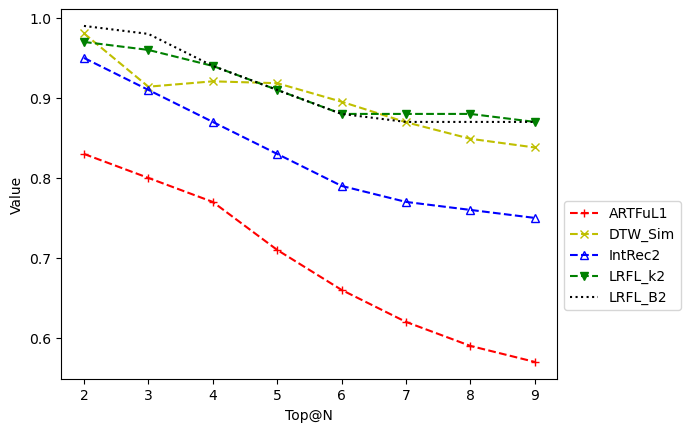

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#of 1 sec data
ARTFuL1=[0.83,0.8,0.77,0.71,0.66,0.62,0.59,0.57]
IntRec1  =[0.95,0.91,0.87,0.83,0.79,0.77,0.76,0.75]
LRFL_k1  =[0.97,0.96,0.94,0.91,0.88,0.88,0.88,0.87]
LRFL_B1  =[0.99,0.98,0.94,0.91,0.88,0.87,0.87,0.87]

#of 2 sec data
# IntRec2  =[0.95,0.94,0.90,0.86,0.82,0.80,0.79,0.79]
# LRFL_k2  =[0.97,0.95,0.91,0.88,0.86,0.85,0.84,0.84]
# LRFL_B2  =[0.98,0.97,0.95,0.91,0.88,0.87,0.87,0.86]

# of 3 sec data
# IntRec3  =[0.95,0.91,0.89,0.86,0.84,0.82,0.82,0.81]
# LRFL_k3  =[0.95,0.92,0.89,0.85,0.81,0.79,0.79,0.78]
# LRFL_B3  =[0.99,0.94,0.90,0.87,0.82,0.80,0.79,0.79]

x=np.arange(2,10,1)

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
#plt.title("Tpo@n grap")
plt.xlabel("Top@N")
plt.ylabel("Value")

#["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
ax.plot(x,ARTFuL1,c='r',marker="+",ls='--',label='ARTFuL1',fillstyle='none')
ax.plot(x,top_ndcg,c='y',marker="x",ls='--',label='DTW_Sim',fillstyle='none')
ax.plot(x,IntRec1,c='b',marker="^",ls='--',label='IntRec2',fillstyle='none')
ax.plot(x,LRFL_k1,c='g',marker="v",ls='--',label='LRFL_k2')
ax.plot(x,LRFL_B1,c='k',ls=':',label='LRFL_B2')

#ax.plot(x,x-1,c='k',marker="+",ls=':',label='MSD')
path=r"C:\Users\KIIT\Downloads\Flip learning pedagogy DTW\For 1 sec\Top N\Top "

plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.draw()
plt.savefig(path+'@n.png', bbox_inches='tight')
plt.savefig(path+'@n.pdf', bbox_inches='tight')